## Pytorch Neural Network
---

In [2]:
import os
import torch
from torch import nn                          # 신경망모듈
from torch.utils.data import DataLoader       # 데이터 로딩 관련 모듈
from torchvision import datasets, transforms  # torch저장소 데이터 셋 모듈

### [1] 데이터 준비
---

In [3]:
## Tensor의 저장소 설정을 위한 체크
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [45]:
t1=torch.tensor([1,2,3])

In [48]:
t1.add_(10)

tensor([11, 12, 13])

In [52]:
import pandas as pd

df=pd.DataFrame([[1,1,1],[2,2,2]])
df

,0,1,2
0,1,1,1
1,2,2,2


In [54]:
df.drop(0, axis=0)

,0,1,2
1,2,2,2


In [56]:
df

,0,1,2
0,1,1,1
1,2,2,2


In [57]:
df.sum(axis=0)

0    3
1    3
2    3
dtype: int64

In [58]:
df.sum(axis=1)

0    3
1    6
dtype: int64

In [53]:
t1.scatter_()

### NN 모델 생성
---

In [4]:
# 순차적인 Layer 구성 => Sequential, Layer...
class NeuralNetwork(nn.Module):
    
    # 생성자 메서드, NeuralNetwork() 객체 생성 시 실행 (상속)
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.flatten = nn.Flatten()
        
        self.linear_relu_stack = nn.Sequential(
            # 입력층 (input_dim, output_dim)
            nn.Linear(28*28, 512),
            nn.ReLU(),
            
            # 은닉층 (input_dim, output_dim)
            nn.Linear(512, 512),
            nn.ReLU(),
            
            # 출력층 (input_dim, output_dim)
            nn.Linear(512, 10),
        )

    # NN 모델이 동작을 시작할 때 실행
    def forward(self, x):
        # 1차원으로 데이터 변환
        x = self.flatten(x)
        
        # NN모델에 입력 데이터 전달
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
# NN모델 생성
mnistM=NeuralNetwork().to(device)

In [8]:
print(mnistM)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [31]:
# 데이터 준비
X = torch.rand(1, 28, 28, device=device)
print(f'X => {X}')

X => tensor([[[0.3017, 0.8909, 0.4489, 0.4192, 0.1233, 0.4669, 0.8885, 0.5276,
          0.2947, 0.6977, 0.0203, 0.7300, 0.5554, 0.1313, 0.4935, 0.3202,
          0.9425, 0.5040, 0.1471, 0.9449, 0.8812, 0.0764, 0.8920, 0.8552,
          0.5442, 0.4440, 0.2035, 0.3555],
         [0.3283, 0.0976, 0.9505, 0.6044, 0.2612, 0.0989, 0.4806, 0.2488,
          0.0679, 0.5236, 0.2860, 0.9682, 0.8617, 0.9717, 0.5420, 0.0803,
          0.0850, 0.6198, 0.5326, 0.2650, 0.9647, 0.1505, 0.3944, 0.5859,
          0.4659, 0.9760, 0.1968, 0.0039],
         [0.6483, 0.7058, 0.2679, 0.3106, 0.7917, 0.4381, 0.1620, 0.9774,
          0.8498, 0.4014, 0.0708, 0.0467, 0.0866, 0.2377, 0.3834, 0.6222,
          0.8808, 0.0093, 0.4516, 0.6011, 0.6446, 0.3990, 0.6578, 0.5444,
          0.1700, 0.3246, 0.4393, 0.8792],
         [0.8292, 0.3050, 0.9541, 0.5019, 0.9013, 0.0285, 0.4887, 0.9909,
          0.6944, 0.7377, 0.5217, 0.2220, 0.4946, 0.4233, 0.0470, 0.0971,
          0.4838, 0.9022, 0.1961, 0.5105, 0.8323, 0.

In [29]:
inputT=torch.rand(1, 28, 28)

In [30]:
inputT.shape, inputT.ndim

(torch.Size([1, 28, 28]), 3)

In [35]:
X.shape, X.ndim

(torch.Size([1, 28, 28]), 3)

In [32]:
# 학습
logists = mnistM(X)

In [36]:
print(f'학습 결과 -----------\n{logits}, {logits.shape}')

학습 결과 -----------
tensor([[ 0.0684,  0.0299,  0.0587,  0.0653, -0.0693, -0.0264, -0.0087, -0.0993,
         -0.0136,  0.0315]], grad_fn=<AddmmBackward0>), torch.Size([1, 10])


In [37]:
# 결과 분석
pred_probab = nn.Softmax(dim=1)(logits)
print(f"pred_probab: {pred_probab}")

y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

pred_probab: tensor([[0.1065, 0.1025, 0.1055, 0.1062, 0.0928, 0.0969, 0.0986, 0.0901, 0.0981,
         0.1027]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0])


## PyTorch의 Dataset 사용

In [39]:
from torchvision.transforms import ToTensor   # 데이터 => Tensor로 변환

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [40]:
type(training_data), training_data.data.shape

(torchvision.datasets.mnist.FashionMNIST, torch.Size([60000, 28, 28]))

In [41]:
type(test_data), test_data.data.shape

(torchvision.datasets.mnist.FashionMNIST, torch.Size([10000, 28, 28]))

In [42]:
type(datasets.FashionMNIST.train_labels)

property

img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])


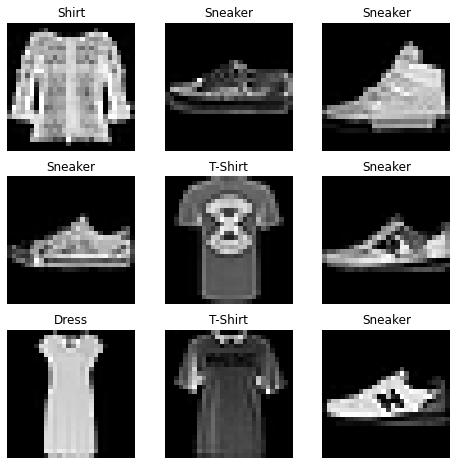

In [44]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    print(f'img => {img.shape}')
    a = img.squeeze()
    print(f'a.shape => {a.shape}')
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()